In [3]:
!pip install tensorflow

  Created wheel for wrapt: filename=wrapt-1.12.1-py3-none-any.whl size=19558 sha256=8bc8b635acbb053199d98ff1295cf09d064d549a8a8e1420c2410d1307cb85df
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\5f\fd\9e\b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=c46e62e2ab9f95c735e5b732af2f90dd29b0696101edc21481ebdc9aebc1cfef
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built wrapt termcolor
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.11.2
    Uninstalling wrapt-1.11.2:
      Successfully uninstalled wrapt-1.11.2


In [4]:
!pip install haversine

In [1]:
from haversine import haversine

In [2]:
import pandas as pd

In [3]:
cfdata = pd.read_csv('./data/cfdata.csv')

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
x0 = cfdata.X[0]
y0 = cfdata.Y[0]

In [5]:
x1 = cfdata.X[1]
y1 = cfdata.Y[1]

In [6]:
a = (y0,x0)
a

(37.525438046706185, 127.13430610519077)

In [7]:
b = (y1,x1)
b

(37.53941582703453, 127.13187693408608)

In [8]:
type(haversine(a,b, unit='km'))

float

In [9]:
#cfdata = cfdata.drop(['Unnamed: 0'],axis=1)
date = pd.to_datetime(cfdata['DCBYMD'],format='%Y-%m-%d')
opdate = pd.to_datetime(cfdata['APVPERMYMD'],format='%Y-%m-%d')
cfdata['DCBYMD'] = date
cfdata['APVPERMYMD'] = opdate

cfdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24541 entries, 0 to 24540
Data columns (total 40 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   24541 non-null  int64         
 1   APVPERMYMD   24541 non-null  datetime64[ns]
 2   TRDSTATEGBN  24541 non-null  int64         
 3   TRDSTATENM   24541 non-null  object        
 4   DCBYMD       8624 non-null   datetime64[ns]
 5   SITEAREA     23486 non-null  object        
 6   BPLCNM       24541 non-null  object        
 7   X            24541 non-null  float64       
 8   Y            24541 non-null  float64       
 9   region       24541 non-null  object        
 10  ADDR         24541 non-null  object        
 11  JIGA         24541 non-null  int64         
 12  at4          24541 non-null  int64         
 13  po3          24541 non-null  int64         
 14  num_unv      24541 non-null  int64         
 15  unv_name     24541 non-null  object        
 16  unv_

In [12]:
#개업날짜 2020 2월 이후?
#3개월, 6개월, 1년 단위
#개업, 폐업  ~~ 총 7개
cfdata['op_op'] = 0
cfdata['op_op_12'] = 0
cfdata['op_op_6'] = 0
cfdata['op_op_3'] = 0
cfdata['op_cl'] = 0
cfdata['op_cl_12'] = 0
cfdata['op_cl_6'] = 0
cfdata['op_cl_3'] = 0
cfdata['cl_op'] = 0
cfdata['cl_op_12'] = 0
cfdata['cl_op_6'] = 0
cfdata['cl_op_3'] = 0
cfdata['cl_cl'] = 0
cfdata['cl_cl_12'] = 0
cfdata['cl_cl_6'] = 0
cfdata['cl_cl_3'] = 0

cfdata.iloc[:,40:]

,op_op,op_op_12,op_op_6,op_op_3,op_cl,op_cl_12,op_cl_6,op_cl_3,cl_op,cl_op_12,cl_op_6,cl_op_3,cl_cl,cl_cl_12,cl_cl_6,cl_cl_3
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24536,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24537,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24538,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24539,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
cfdata.APVPERMYMD   #개업날짜

0       2013-11-13
1       2015-07-08
2       2014-03-20
3       2014-12-05
4       2013-01-03
           ...    
24536   2011-03-02
24537   2010-09-16
24538   2010-05-27
24539   2009-10-29
24540   2013-12-20
Name: APVPERMYMD, Length: 24541, dtype: datetime64[ns]

In [14]:
cfdata.DCBYMD    #폐업날짜

0       2017-10-11
1       2017-07-10
2       2017-07-17
3       2017-06-02
4       2017-05-18
           ...    
24536          NaT
24537          NaT
24538          NaT
24539          NaT
24540          NaT
Name: DCBYMD, Length: 24541, dtype: datetime64[ns]

In [15]:
abs((cfdata.APVPERMYMD[0] - cfdata.DCBYMD[1]).days)

1335

In [16]:
def dist_func(i,j):
    x0 = cfdata.X[i]
    y0 = cfdata.Y[i]

    x1 = cfdata.X[j]
    y1 = cfdata.Y[j]

    a = (y0,x0)
    b = (y1,x1)

    dist = haversine(a,b, unit='km')
    
    return dist

In [17]:
dist=dist_func(0,1)
dist

1.5689510831483644

In [19]:
q=0
for i in range(len(cfdata)):
    min_dist = 1
    
    if cfdata['TRDSTATEGBN'][i] == 1 :
        t1=0
        t1_12=0
        t1_6=0
        t1_3=0
        t3=0
        t3_12=0
        t3_6=0
        t3_3=0
        #cfdata['TRDSTATEGBN'][i]=1 / 영업중

        for j in range(len(cfdata)):
            
            if i == j :
                continue
                
            dist = dist_func(i,j)

            if dist > 1 :
                continue
                
            if min_dist > dist :
                min_dist = dist

            if cfdata['TRDSTATEGBN'][j] == 1 :
                #i(1)&j(1)
                
                # 두 가게의 거리가 1km 미만일때
                t1 += 1

                if abs((cfdata.APVPERMYMD[i] - cfdata.APVPERMYMD[j]).days) < 365 :
                    t1_12 +=1
                if abs((cfdata.APVPERMYMD[i] - cfdata.APVPERMYMD[j]).days) < 187:
                    t1_6 +=1
                if abs((cfdata.APVPERMYMD[i] - cfdata.APVPERMYMD[j]).days) < 93:
                    t1_3 +=1               

            elif cfdata['TRDSTATEGBN'][j] == 3 :
                #i(1)&j(3)

                # 두 가게의 거리가 1km 미만일때
                t3 += 1

                if abs((cfdata.APVPERMYMD[i] - cfdata.DCBYMD[j]).days) < 365 :
                    t3_12 +=1
                if abs((cfdata.APVPERMYMD[i] - cfdata.DCBYMD[j]).days) < 187:
                    t3_6 +=1
                if abs((cfdata.APVPERMYMD[i] - cfdata.DCBYMD[j]).days) < 93:
                    t3_3 +=1      
                    
        cfdata['op_op'][i] = t1
        cfdata['op_op_12'][i] = t1_12
        cfdata['op_op_6'][i] = t1_6
        cfdata['op_op_3'][i] = t1_3
        cfdata['op_cl'][i] = t3
        cfdata['op_cl_12'][i] = t3_12
        cfdata['op_cl_6'][i] = t3_6
        cfdata['op_cl_3'][i] = t3_3

    else:
        s1=0
        s1_12=0
        s1_6=0
        s1_3=0
        s3=0
        s3_12=0
        s3_6=0
        s3_3=0
        #cfdata['TRDSTATEGBN'][i]=3 / 폐업
        for j in range(len(cfdata)):
            dist = dist_func(i,j)

            if i == j :
                continue
                
            if dist > 1 :
                continue
                
            if min_dist > dist :
                min_dist = dist

            if cfdata['TRDSTATEGBN'][j] == 3 :
                #i(1)&j(3)
                
                # 두 가게의 거리가 1km 미만일때
                s1 += 1

                if abs((cfdata.DCBYMD[i] - cfdata.APVPERMYMD[j]).days) < 365 :
                    s1_12 +=1
                if abs((cfdata.DCBYMD[i] - cfdata.APVPERMYMD[j]).days) < 187:
                    s1_6 +=1
                if abs((cfdata.DCBYMD[i] - cfdata.APVPERMYMD[j]).days) < 93:
                    s1_3 +=1 
            else :

                #i(3)&k(3)

                s3 += 1

                if abs((cfdata.DCBYMD[i] - cfdata.DCBYMD[j]).days) < 365 :
                    s3_12 +=1
                if abs((cfdata.DCBYMD[i] - cfdata.DCBYMD[j]).days) < 187:
                    s3_6 +=1
                if abs((cfdata.DCBYMD[i] - cfdata.DCBYMD[j]).days) < 93:
                    s3_3 +=1 

        cfdata['cl_op'][i] = s1
        cfdata['cl_op_12'][i] = s1_12
        cfdata['cl_op_6'][i] = s1_6
        cfdata['cl_op_3'][i] = s1_3
        cfdata['cl_cl'][i] = s3
        cfdata['cl_cl_12'][i] = s3_12
        cfdata['cl_cl_6'][i] = s3_6
        cfdata['cl_cl_3'][i] = s3_3
    
    q+=1

    if q % 10000 == 0 :
        print(q)
        
len(cfdata)

<ipython-input-19-66529260f763>:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cfdata['cl_op'][i] = s1
<ipython-input-19-66529260f763>:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cfdata['cl_op_12'][i] = s1_12
<ipython-input-19-66529260f763>:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cfdata['cl_op_6'][i] = s1_6
<ipython-input-19-66529260f763>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

10000
20000


24541

<AxesSubplot:>

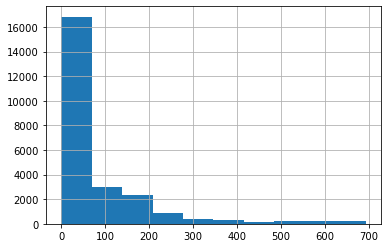

In [31]:
cfdata.cl_cl.hist()

In [27]:
cfdata = cfdata.drop(['Unnamed: 0'],axis=1)

In [29]:
cfdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24541 entries, 0 to 24540
Data columns (total 55 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   APVPERMYMD   24541 non-null  datetime64[ns]
 1   TRDSTATEGBN  24541 non-null  int64         
 2   TRDSTATENM   24541 non-null  object        
 3   DCBYMD       8624 non-null   datetime64[ns]
 4   SITEAREA     23486 non-null  object        
 5   BPLCNM       24541 non-null  object        
 6   X            24541 non-null  float64       
 7   Y            24541 non-null  float64       
 8   region       24541 non-null  object        
 9   ADDR         24541 non-null  object        
 10  JIGA         24541 non-null  int64         
 11  at4          24541 non-null  int64         
 12  po3          24541 non-null  int64         
 13  num_unv      24541 non-null  int64         
 14  unv_name     24541 non-null  object        
 15  unv_dist     24541 non-null  object        
 16  regi

In [33]:
cfdata.to_csv('./data/cfdata.csv',encoding='utf-8')

In [118]:
dj_data

,APVPERMYMD,TRDSTATEGBN,TRDSTATENM,DCBYMD,SITEAREA,BPLCNM,X,Y,region,ADDR,...,op_cl_6,op_cl_3,cl_op,cl_op_12,cl_op_6,cl_op_3,cl_cl,cl_cl_12,cl_cl_6,cl_cl_3
0,2009-03-23,3,폐업,2017-10-19,25.10,커피나무,126.920799,37.497518,동작구,서울특별시 동작구 여의대방로22나길 1,...,0,0,40,10,5,0,65,0,0,0
1,2015-08-06,3,폐업,2017-05-16,154.62,카페아이엠티숭실대점,126.954995,37.495140,동작구,서울특별시 동작구 상도로 381,...,0,0,24,5,2,1,45,0,0,0
2,2015-08-10,3,폐업,2017-07-19,20.00,그리다꿈노량진점,126.944998,37.512912,동작구,서울특별시 동작구 만양로14가길 30-3,...,0,0,63,11,6,1,114,0,0,0
3,2001-10-25,3,폐업,2017-10-17,19.16,늘솜카페,126.952048,37.504768,동작구,서울특별시 동작구 흑석로 12,...,0,0,55,13,9,6,121,0,0,0
4,2013-10-21,3,폐업,2017-09-25,25.00,뽐뽐,126.930340,37.497146,동작구,서울특별시 동작구 국사봉길 60,...,0,0,48,12,6,3,74,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,2012-02-17,1,영업/정상,NaT,16.20,카페1987,126.943922,37.513387,동작구,서울특별시 동작구 노량진로 162,...,0,0,0,0,0,0,0,0,0,0
702,2012-05-16,1,영업/정상,NaT,202.00,설빙 노량진점,126.941829,37.513423,동작구,서울특별시 동작구 노량진로 144,...,0,0,0,0,0,0,0,0,0,0
703,2012-05-21,1,영업/정상,NaT,18.00,미모,126.936854,37.503770,동작구,서울특별시 동작구 상도로 161,...,0,0,0,0,0,0,0,0,0,0
704,2010-10-07,1,영업/정상,NaT,5.17,커피자리,126.943922,37.513387,동작구,서울특별시 동작구 노량진로 162,...,0,0,0,0,0,0,0,0,0,0
